Partimos de un archivo generado en el capitulo1_"2 ,**transcript.txt**, que contiene las transcripciones de los audios en formato txt. En este notebook, el objetivo es extraer información de esas transcripciones (generando un **knowledge graph**). <br>
Una vez extraida la información, ta transferimos a un dataset y de ahí a un grafo utilizando la libreria **networkx**.<br>
Finalmente guardamos la info en un archivo **prueba_grafo.pickle.** que utilizaremos para el apartado 5_6 del proyecto.<br>
**Nota:** El archivo transcript.txt lo he generado a mano.Pero se podía haber generado grabando un audios con cada una de las frases y que la red neuronal anterior lo generase. Contiene el siguiente texto: <br> 
Peter travels to London.<br>
Frank likes Berlin.<br>
Marta goes to Paris.<br>
Frank visits  Madrid.<br>
Kepa goes to Bilbao.<br>
Hellen likes  Berlin.<br>
Peter goes to Paris.<br>
John flies to Vienna.<br>

In [2]:
pip install spacy

  Using cached spacy-3.6.1-cp311-cp311-win_amd64.whl (12.0 MB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached murmurhash-1.0.9-cp311-cp311-win_amd64.whl (18 kB)
  Using cached cymem-2.0.7-cp311-cp311-win_amd64.whl (28 kB)
  Using cached preshed-3.0.8-cp311-cp311-win_amd64.whl (91 kB)
  Using cached thinc-8.1.12-cp311-cp311-win_amd64.whl (1.5 MB)
  Using cached wasabi-1.1.2-py3-none-any.whl (27 kB)
  Using cached srsly-2.4.7-cp311-cp311-win_amd64.whl (479 kB)
  Using cached catalogue-2.0.9-py3-none-any.whl (17 kB)
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached pathy-0.10.2-py3-none-any.whl (48 kB)
  Using cached pydantic-2.3.0-py3-none-any.whl (374 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached annotated_types-0.5.0-py3-none-any.whl (11 kB)
  Using cached pydantic_core-2.6.3-cp311-none-win_amd64.whl (1.7 MB)
  Using cached blis-0.7.10-cp311-cp311-w

In [1]:
## for data
import pandas as pd  #1.1.5
import numpy as np  #1.21.0

## for plotting
import matplotlib.pyplot as plt  #3.3.2

## for text
#import wikipediaapi  #0.5.8
#import nltk  #3.8.1
import re   

## for nlp
import spacy  #3.5.0
from spacy import displacy
#import textacy  #0.12.0

## for graph
import networkx as nx  #3.0 (also pygraphviz==1.10)

## for timeline
#import dateparser #1.1.7

In [4]:
!python -m spacy download en_core_web_md

                                              0.0/42.8 MB ? eta -:--:--
                                              0.2/42.8 MB 7.6 MB/s eta 0:00:06
                                              0.3/42.8 MB 7.2 MB/s eta 0:00:06
                                              0.7/42.8 MB 5.4 MB/s eta 0:00:08
     -                                        1.1/42.8 MB 6.9 MB/s eta 0:00:07
     -                                        1.4/42.8 MB 7.0 MB/s eta 0:00:06
     --                                       2.4/42.8 MB 10.3 MB/s eta 0:00:04
     --                                       2.7/42.8 MB 9.6 MB/s eta 0:00:05
     ----                                     4.3/42.8 MB 13.1 MB/s eta 0:00:03
     -----                                    5.5/42.8 MB 15.9 MB/s eta 0:00:03
     ------                                   7.1/42.8 MB 17.5 MB/s eta 0:00:03
     --------                                 9.5/42.8 MB 21.7 MB/s eta 0:00:02
     ---------                               10.8/42.8

In [3]:
nlp = spacy.load("en_core_web_md")

Cambiamos la estrategia para generar el dataframe

In [4]:
#Python program to read a text file into a list
#opening a file in read mode using open()
file = open('transcript.txt', 'r')

#read text file into list
text = file.read()
#printing the data of the file
print(text)
print(type(text))

Peter travels to London.
Frank likes Berlin.
Marta goes to Paris.
Frank visits  Madrid.
Kepa goes to Bilbao.
Hellen likes  Berlin.
Peter goes to Paris.
John flies to Vienna.
<class 'str'>


In [5]:
doc = nlp(text)

lst_docs = [sent for sent in doc.sents]



## extract entities and relations
dic2 = {"id":[], "entity":[], "relation":[], "lugar":[]}

for n,sentence in enumerate(lst_docs):
    temp_dict = {"id": "", "nsubj":"", "ROOT":"", "pobj":"", "dobj":""}
    dic2["id"].append(n)
    for token in sentence: 
        match token.dep_:
            case "nsubj":
                temp_dict["nsub"] = token.text
            case "pobj":
                temp_dict["pobj"]= token.text
            case "ROOT":
                temp_dict["ROOT"]=token.lemma_
            case "dobj":
                temp_dict["dobj"]= token.text
                
    dic2["entity"].append(temp_dict["nsub"])
    dic2["relation"].append(temp_dict["ROOT"])
    dic2["lugar"].append(temp_dict["dobj"]+temp_dict["pobj"])
   
                                        
print(dic2)   
## create dataframe
dtf2 = pd.DataFrame(dic2)

dtf2


{'id': [0, 1, 2, 3, 4, 5, 6, 7], 'entity': ['Peter', 'Frank', 'Marta', 'Frank', 'Kepa', 'Hellen', 'Peter', 'John'], 'relation': ['travel', 'like', 'go', 'visit', 'go', 'like', 'go', 'fly'], 'lugar': ['London', 'Berlin', 'Paris', 'Madrid', 'Bilbao', 'Berlin', 'Paris', 'Vienna']}


,id,entity,relation,lugar
0,0,Peter,travel,London
1,1,Frank,like,Berlin
2,2,Marta,go,Paris
3,3,Frank,visit,Madrid
4,4,Kepa,go,Bilbao
5,5,Hellen,like,Berlin
6,6,Peter,go,Paris
7,7,John,fly,Vienna


['Peter', 'London', 'Frank', 'Berlin', 'Marta', 'Paris', 'Madrid', 'Kepa', 'Bilbao', 'Hellen', 'John', 'Vienna']
[('Peter', 'London'), ('Peter', 'Paris'), ('Frank', 'Berlin'), ('Frank', 'Madrid'), ('Marta', 'Paris'), ('Kepa', 'Bilbao'), ('Hellen', 'Berlin'), ('John', 'Vienna')]
['Peter', 'Peter', 'Frank', 'Frank', 'Marta', 'Kepa', 'Hellen', 'John']


/Users/egoitzaulestiapadilla/opt/anaconda3/envs/Torch3113/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


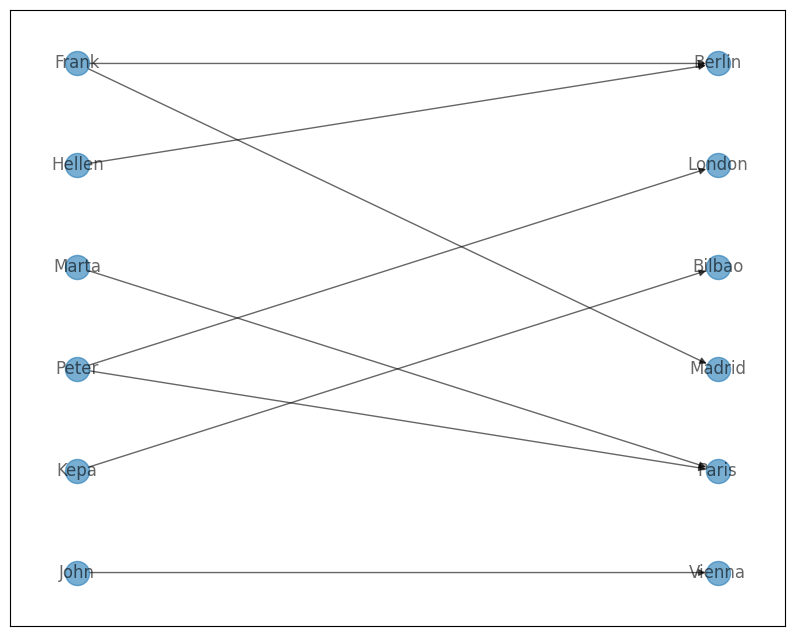

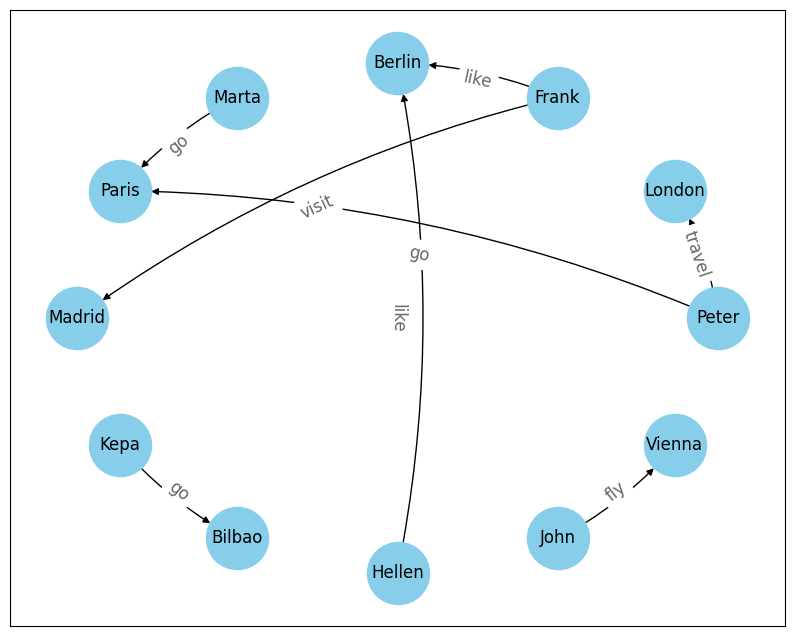

In [8]:
## create full graph
G = nx.from_pandas_edgelist(dtf2, source="entity", target="lugar", 
                            edge_attr="relation", 
                            create_using=nx.DiGraph())

# plot como grafo bipartito ( columna:personas  ; columna:ciudades)
print(G.nodes())
print(G.edges())
entity = [ ent for ent,obj in G.edges()]
print (entity)

from networkx.algorithms import bipartite
plt.figure(figsize=(10,8))
nx.draw_networkx(
    G,
    pos = nx.drawing.layout.bipartite_layout(G, entity),
    #label_pos=0.5, 
    #edge_labels=nx.get_edge_attributes(G,'relation'),
    font_size=12,
    font_color='black',
    alpha=0.6
)

## plot como lo hace el tutorial
plt.figure(figsize=(10,8))

pos = nx.circular_layout(G, )
node_color = "skyblue"
edge_color = "black"

nx.draw_networkx(G, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                         edge_labels=nx.get_edge_attributes(G,'relation'),
                         font_size=12, font_color='black', alpha=0.6)
plt.show()


Ahora lo quiero guardar para la siguiente fase

In [6]:
import pickle

# save graph object to file
pickle.dump(G, open('prueba_grafo.pickle', 'wb'))

